# Loading age data and libraries

In [14]:
library(MCMCpack) # for wakefield 2004
library(ei) # for king 97
library(eco) # for Strauss 2008

age_data = read.csv("../data/social_idade.csv")
age_data = age_data[age_data$N>100,]

# Problem overview

In Ecological Inference we are dealing with the problem of uncovering individual level behaviour from aggregate data. In our case we have agreggated social data on one side and on the other census data informing demographics distribution:



# Functions to calculate metrics of interest

In [2]:
calculateRMSE <- function(predicted,truth){
  rmse <- sqrt( mean( (predicted-truth)^2 , na.rm = TRUE ) )
  return(rmse)
}
calculateMAE <- function(predicted,truth){
  mae <- mean( abs(predicted-truth) , na.rm = TRUE ) 
  return(mae)
}
calculateBias <- function(predicted,truth){
  bias <- mean((predicted-truth) , na.rm = TRUE ) 
  return(bias)
}


# Make predictions using King's solution

In [3]:
dbuf = ei(formula=X ~ Y ,total="N",data=age_data,truth=cbind(age_data$W1,age_data$W2))
predicted_W1_king  <- eiread(dbuf, "betab")
predicted_W2_king  <- eiread(dbuf, "betaw")
cor_W1_king <-cor(predicted_W1_king,age_data$W1,use="complete")
rmse_W1_king <- cor(predicted_W2_king,age_data$W2,use="complete")
cor_W2_king <- calculateRMSE(predicted_W1_king,age_data$W1)
rmse_W2_king <- calculateRMSE(predicted_W2_king,age_data$W2)

[1] "Running 2x2 ei"


Maximizing likelihood
Importance Sampling..


# Making predictions using Wakefield's solution

In [4]:
n = length(age_data$Y)
post <- MCMChierEI(age_data$Y,(1-age_data$Y),age_data$X, (1-age_data$X), 
                   mcmc=500000, burnin= 20000, thin=5, verbose=500000,seed=list(NA, 1))
predicted_W1_wake  <- colMeans(post)[1:n]
predicted_W2_wake  <- colMeans(post)[(n+1):(2*n)]
cor_W1_wake <-cor(predicted_W1_wake,age_data$W1,use="complete")
rmse_W1_wake <- cor(predicted_W2_wake,age_data$W2,use="complete")
cor_W2_wake <- calculateRMSE(predicted_W1_wake,age_data$W1)
rmse_W2_wake <- calculateRMSE(predicted_W2_wake,age_data$W2)


MCMChierEI iteration 1 of 520000 

MCMChierEI iteration 500001 of 520000 


# Making predictions using Strauss' solution

In [5]:
res.ML <-  eco(X ~ Y, N = N, data = age_data, context = TRUE, parameter=TRUE,n.draws = 500000, burnin = 20000, thin = 5, verbose = TRUE)
last_pos = length(res.ML$W[,1,1])
predicted_W1_strauss= res.ML$W[last_pos,1,]
predicted_W2_strauss= res.ML$W[last_pos,2,]
cor_W1_strauss <-cor(predicted_W1_strauss,age_data$W1,use="complete")
rmse_W1_strauss <- cor(predicted_W1_strauss,age_data$W2,use="complete")
cor_W2_strauss <- calculateRMSE(predicted_W2_strauss,age_data$W1)
rmse_W2_strauss <- calculateRMSE(predicted_W2_strauss,age_data$W2)

Starting Gibbs Sampler...
 10 percent done.
 20 percent done.
 30 percent done.
 40 percent done.
 50 percent done.
 60 percent done.
 70 percent done.
 80 percent done.
 90 percent done.
100 percent done.


# Visualizing results

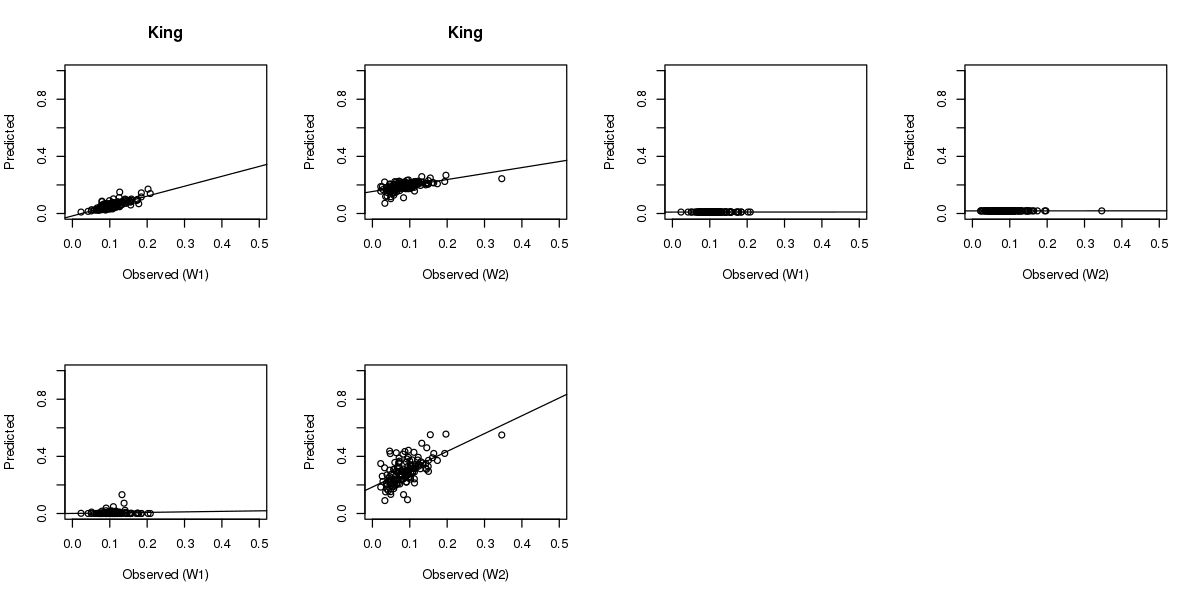

In [20]:
par(mfrow=c(2,4))
options(repr.plot.width=10, repr.plot.height=5)

#plotting kings
regW1 <- lm(predicted_W1_king ~age_data$W1)
plot(age_data$W1,predicted_W1_king, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W1)", ylab="Predicted", main= "King")
abline(regW1)
regW2 <- lm(predicted_W2_king ~age_data$W2  )
plot(age_data$W2,predicted_W2_king, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W2)", ylab="Predicted", main= "King")
abline(regW2)
#plotting wakefield
regW1 <- lm(predicted_W1_wake ~age_data$W1)
plot(age_data$W1,predicted_W1_wake, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W1)", ylab="Predicted")
abline(regW1)
regW2 <- lm(predicted_W2_wake ~age_data$W2)
plot(age_data$W2,predicted_W2_wake, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W2)", ylab="Predicted")
abline(regW2)
#plotting strauss
regW1 <- lm(predicted_W1_strauss ~age_data$W1)
plot(age_data$W1,predicted_W1_strauss, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W1)", ylab="Predicted")
abline(regW1)
regW2 <- lm(predicted_W2_strauss ~age_data$W2  )
plot(age_data$W2,predicted_W2_strauss, xlim = range(0,0.5),ylim=range(0,1), xlab="Observed (W2)", ylab="Predicted")
abline(regW2)

In [12]:
sprintf("Kings solution")
sprintf("----------------")
sprintf("< 40 years cor: %f >40 years cor: %f", cor_W1_king,rmse_W1_king)
sprintf("< 40 years rmse: %f >40 years rmse: %f", cor_W2_king,rmse_W2_king)
sprintf("")
sprintf("Wakefields solution")
sprintf("----------------")
sprintf("< 40 years cor: %f >40 years cor: %f", cor_W1_wake,rmse_W1_wake)
sprintf("< 40 years rmse: %f >40 years rmse: %f", cor_W2_wake,rmse_W2_wake)
sprintf("")
sprintf("Strauss solution")
sprintf("----------------")
sprintf("< 40 years cor: %f >40 years cor: %f", cor_W1_strauss,rmse_W1_strauss)
sprintf("< 40 years rmse: %f >40 years rmse: %f", cor_W2_strauss,rmse_W2_strauss)

[1] "Kings solution"

[1] "----------------"

[1] "< 40 years cor: 0.790961 >40 years cor: 0.587888"

[1] "< 40 years rmse: 0.053507 >40 years rmse: 0.108558"

[1] ""

[1] "Wakefields solution"

[1] "----------------"

[1] "< 40 years cor: 0.823368 >40 years cor: 0.663156"

[1] "< 40 years rmse: 0.103133 >40 years rmse: 0.081191"

[1] ""

[1] "Strauss solution"

[1] "----------------"

[1] "< 40 years cor: 0.079603 >40 years cor: 0.009087"

[1] "< 40 years rmse: 0.198749 >40 years rmse: 0.218064"